In [1]:
import os
import sys
import import_ipynb
import pandas as pd
import numpy as np
#local lib
sys.path.insert(0, os.path.abspath('../KindScoreModel'))
import KindScore as ks
import SpeechRecognition as sr

importing Jupyter notebook from KindScore.ipynb
importing Jupyter notebook from SpeechRecognition.ipynb
Set minimum energy threshold to 52.72080963925191


### Read data source

In [38]:
df = pd.read_csv("data/dataset/dataReV5.csv")
df

,Vehicle,restaurant,food delivery,Problem,score,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,ไม่มีอะไรน่ากิน,3.0,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
5,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",ไม่อะไรกิน,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,มากกว่า 3 ชั่วโมง,6 - 10 นาที,100-200 บาท
6,รถจักรยานยนต์,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",เบื่ออาหารที่อยู่ในคณะ และค่าอาหารพร้อมจัดส่งท...,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
7,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",เร็ว ได้กินอาหารที่อยากกิน,ไม่มีร้านอาหารที่ชอบ,3.2,น้อยกว่า 1 ชั่วโมง,6 - 10 นาที,51-100บาท
8,รถมอไซค์,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ร้านน้ำ,...","เวลา, ความสะดวก, สถานที่",ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,2 - 3 ชั่วโมง,6 - 10 นาที,0-50 บาท
9,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ร้านน้ำ",ความขี้เกียจ และร้านอาหารไกลเกินไป,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,มากกว่า 3 ชั่วโมง,1 - 5 นาที,100-200 บาท


### Algorithm KindScore

Optimal Cluster Number:  5


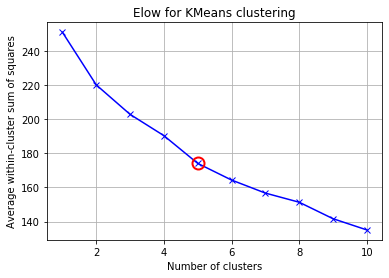

KindScore.ipynb:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "source": [


In [93]:
data, model = ks.KindScoreModel(df,"Problem","score")

In [146]:
problemList =  []

### file wav
problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/01.wav",15))
problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/02.wav",15))
problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/03.wav",15))
problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/04.wav",15))

### said problem
# problemList.append(sr.SpeechRecognition("speech"))

### file wav V2
### Step one : call SpeechRecognition("file") 
### Step two : input path file [only type String]
### Step tree :input second to recognitions [only type Integer]
# problemList.append(sr.SpeechRecognition("file"))
problemList

Processing !!
You said: มันก็แบบที่หน้าโรงอาหารก็อย่าว่ากันรอคิวนี้มันมีหลายชุดแล้วก็ใช้เวลาในการทำนาถ้าเราสั่งล่วงหน้าตามันก็จะง่ายนี้ราคามันก็ไม่รับพร้อมเพย์เงินกู้มีตู้เดียว
Processing !!
You said: ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เธอก็คือว่าแบบบางร้านอาหารนะเพราะผัดอาหารก็จะมีควันออกมาซึ่งนี่เป็นคนไม่ค่อยชอบฟันกินอาหารเพราะมันจะติดตัวแบบนี้แล้วก็บางทีอ่ะเพราะโรงอาหารคนเยอะช่วงเที่ยงตรงกลางมันร้อนแดดมันส่องอื่นก็ร้อนก็นั่งไม่ได้แล้วอาหารบางทีสมมุติถ้าเลิกช้าๆก็ไม่มีข้าวกินแล้วก็ต้องไปกินข้าวที่โรงอาหารอื่นประมาณนี้
Processing !!
You said: โรงอาหารน่ะตั้งแต่ปี 1 เริ่มรับนักศึกษาเยอะขึ้นน่ะก็เริ่มไม่มีที่นั่งแล้วก็ร้านอาหารแต่ละร้านคิวยาวมากทำให้บอกว่าถ้าสั่งอาหารก็ต้องรอนานมากส่วนมากก็จะแก้ปัญหาโดยการไปกินช่วงเวลาหรือไม่ก็ถ้าจำเป็นจริงก็ไปกินที่อื่น
Processing !!
You said: ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย


['มันก็แบบที่หน้าโรงอาหารก็อย่าว่ากันรอคิวนี้มันมีหลายชุดแล้วก็ใช้เวลาการทำนาถ้าเราสั่งล่วงหน้าตามันก็จะง่ายนี้ราคามันก็ไม่รับพร้อมเพย์เงินกู้มีตู้เดียว',
 'ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เธอก็คือว่าแบบบางร้านอาหารนะเพราะผัดอาหารก็จะมีควันออกมาซึ่งนี่เป็นคนไม่ค่อยชอบฟันกินอาหารเพราะมันจะติดตัวแบบนี้แล้วก็บางทีอ่ะเพราะโรงอาหารคนเยอะช่วงเที่ยงตรงกลางมันร้อนแดดมันส่องอื่นก็ร้อนก็นั่งไม่ได้แล้วอาหารบางทีสมมุติถ้าเลิกช้าๆก็ไม่มีข้าวกินแล้วก็ต้องไปกินข้าวที่โรงอาหารอื่นประมาณนี้',
 'โรงอาหารน่ะตั้งแต่ปี 1 เริ่มรับนักศึกษาเยอะขึ้นน่ะก็เลยไม่มีที่นั่งแล้วก็ร้านอาหารแต่ละร้านอาหารคิวยาวมากทำให้บอกว่าถ้าสั่งอาหารก็ต้องรอนานมากส่วนมากก็จะแก้ปัญหาโดยการไปกินช่วงเวลาอื่นเอาไม่ก็ถ้าจำเป็นจริงก็ไปกินที่อื่น',
 'ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย']

### Weight score new problem in same cluster and wirte file csv

In [10]:
# data

In [94]:
# problemList =  []
# problemList.append("ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย")
# problemList.append("ปัญหาด้านกลิ่นด้านddb")
# problemList

['ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย',
 'ปัญหาด้านกลิ่นด้านddb']

In [7]:
data.loc[data["cluster"]== 2]

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,2
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,2
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,2
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,2
5,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,2
6,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,2
8,ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,2
9,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,2
12,โรงอาหารคนเยอะทำให้ไม่อยากซื้อ,7.6,2


### similarity > 0.7 else write problem not match|

In [12]:
# ks.Weightscore("data/dataReV656",problemList,data,model,"Problem","score")

In [13]:
# df = pd.read_csv("data/dataReV656.csv")
# df

### Test Read file and do Algorithm KS again

In [174]:
def Weightscore(path : str, sentence, dataset,model, pathNotmacth: str):
    text = sentence
    pathFile = path+'.csv'
    pathNotmacth = pathNotmacth+".csv"
    cluster = []
    l = []
    Newproblem = []
    Oldproblem = []
    similarity = []


    for word in text:
        l.append(ks.sentence_vectorizer(word)[0])
    KL=np.array(l)
    
    newProblem = model.predict(KL)
    cluster.append(newProblem)
    
    for countgroup in range(len(newProblem)):
        state_score = ""
        state_similarity = 0
        oldtext = ""
        for index in dataset[dataset['cluster'] == newProblem[countgroup]].values:

            check_similarity = ks.sentence_similarity(text[countgroup], index[0])
            if(check_similarity > state_similarity):
                state_similarity = check_similarity
                state_score = index[1]
                oldtext =  index[0]
        print(text[countgroup],state_score,state_similarity[0][0],oldtext)
        if(state_similarity >= 0.7):
            print("state_similarity >= 0.7 || 1")
            dataset.loc[dataset.shape[0]]= [text[countgroup],state_score,newProblem[countgroup]];
        else:
            print("state_similarity <= 0.7")
            for index in dataset[dataset['cluster'] != newProblem[countgroup]].values:
                check_similarity = ks.sentence_similarity(text[countgroup], index[0])
                if(check_similarity > state_similarity):
                    state_similarity = check_similarity
                    state_score = index[1]
                    oldtext =  index[0]

            if(state_similarity >= 0.7):
                print("state_similarity >= 0.7 || 2")
                dataset.loc[dataset.shape[0]]= [text[countgroup],state_score,newProblem[countgroup]];
            else:
                
                Newproblem.append(text[countgroup])
                Oldproblem.append(oldtext)
                similarity.append(state_similarity[0][0])
#                 data_notmatch.loc[dataset.shape[0]]= [text[countgroup],oldtext,state_similarity[0][0]];
        
    with open(pathFile, 'w',encoding='utf-8-sig') as f:
        dataset.to_csv(f, header=True,index=False)

    with open(pathNotmacth, 'w',encoding='utf-8-sig') as f:
        data_notmatch = pd.DataFrame({"Newproblem":Newproblem,"Oldproblem":Oldproblem,"similarity":similarity})
        data_notmatch.to_csv(f, header=True,index=False)
#     return print("write result to path :",pathFile)
    return dataset

In [136]:
# data_notmatch = pd.DataFrame({"Newproblem":[],"score":[],"Oldproblem":[],"similarity":[],})
# data_notmatch

In [137]:
# data

In [175]:
problemList = []


problemList

['ปัญหาอะสัสเอ้ย',
 'ปัญหาอหกดฟหกดฟหดอ้ย',
 'ปัญหาอหasfsadt4w5e sadfดอ้ย',
 'ปัญหาอหกด79874 ดอ้ย']

In [177]:
Weightscore("data/dataReV6987",problemList,data,model,"data/dataNotmatt")

ปัญหาอะสัสเอ้ย 7.8 0.29622720295005367 ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย
state_similarity <= 0.7
ปัญหาอหกดฟหกดฟหดอ้ย 7.8 0.3374876008638661 ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย
state_similarity <= 0.7
ปัญหาอหasfsadt4w5e sadfดอ้ย 7.8 0.2890470628350217 ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย
state_similarity <= 0.7
ปัญหาอหกด79874 ดอ้ย 7.8 0.33748760086386614 ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย
state_similarity <= 0.7


,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,2
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,2
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,2
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,2
5,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,2
6,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,2
7,ไม่มีร้านอาหารที่ชอบ,3.2,3
8,ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,2
9,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,2


In [182]:
if(pd.read_csv("data/dataNotmatt2.csv")):
    print("ok")
else:
    print("NO!")

FileNotFoundError: [Errno 2] File b'data/dataNotmatt2.csv' does not exist: b'data/dataNotmatt2.csv'

### next step real time problem with speechrecogniton google

### plase doing after finish cluster file wav

In [8]:
sr.SpeechRecognition("file")

Path file wav: [String]
C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/04.wav
Process wav in second:  [Integer]
15
Processing file plase waiting !!!
You said: ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย


'ปัญหาด้านกลิ่นด้านการทำอาหารอาบน้ำทำส่วนมากอย่างนี้ที่นั่งไม่เพียงพอมีจองด้วยอะไรเยอะแยะวุ่นวาย'

In [9]:
sr.SpeechRecognition("speech")

Wake UP!! : said something
You said: วันนี้รู้สึกว่าโรงอาหารน่าเบื่อมากครับ


'วันนี้รู้สึกว่าโรงอาหารน่าเบื่อมากครับ'

In [10]:
# "C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/01.wav",15

('C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/01.wav',
 15)

In [11]:
# problemList =  []
# problemList.append(sr.SpeechRecognition("file"))
# problemList.append(sr.SpeechRecognition("file"))
# problemList.append(sr.SpeechRecognition("file"))